In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import gc
import warnings
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]

# 设置正常显示符号
mpl.rcParams["axes.unicode_minus"] = False
warnings.filterwarnings('ignore')

rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(style='ticks', rc=rc)

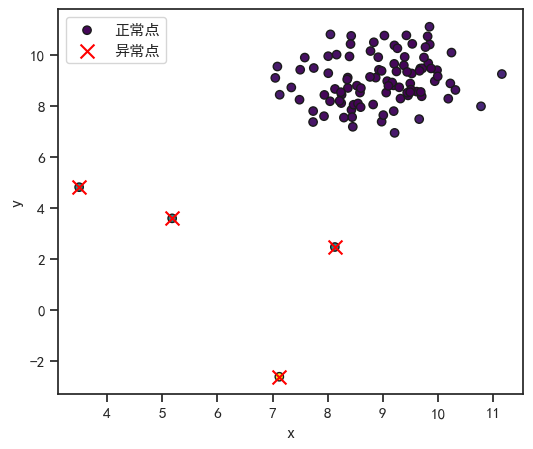

In [34]:
from pyod.models.knn import KNN
from pyod.utils import generate_data

# 生成包含正常数据、点异常和条件异常的数据集
contamination = 0.04  # 异常比例
n_samples = 100
X_train, X_test, y_train, y_test = generate_data(n_train=n_samples, n_test=n_samples, n_features=2,
                                                  contamination=contamination)

# 使用 PyOD 中的 KNN 模型
model = KNN()
model.fit(X_train)

# 获取异常分数
scores_train = model.decision_scores_

# 在测试集上进行预测
y_test_pred = model.predict(X_test)
scores_test = model.decision_function(X_test)

# 绘制异常点图
plt.figure(figsize=(6, 5))
plt.xlabel('x')
plt.ylabel('y')

# 绘制训练集中的散点图
plt.scatter(X_train[:, 0], X_train[:, 1], c=scores_train, cmap='viridis', marker='o', edgecolors='k', label='正常点')

# 标记异常点
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', marker='x', s=100, label='异常点')

# 显示图例
plt.legend()

plt.show()


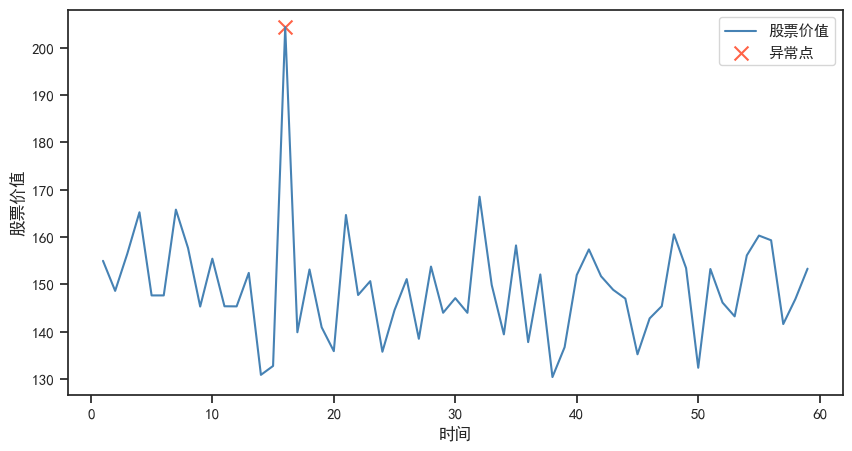

In [7]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用微软雅黑或其他中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# 生成时间序列数据
np.random.seed(42)
days = np.arange(1, 60)
stock_prices = np.random.normal(loc=150, scale=10, size=len(days))

# 引入一个点异常
anomaly_index = 15
stock_prices[anomaly_index] += 60

# 定义更好看的颜色
line_color = 'steelblue'
scatter_color = 'tomato'

# 绘制时间序列图
plt.figure(figsize=(10, 5))
sns.lineplot(x=days, y=stock_prices, label='股票价值', color=line_color)

# 标注异常点
plt.scatter(days[anomaly_index], stock_prices[anomaly_index], color=scatter_color, label='异常点', marker='x', s=100)

# 设置图形标题和标签
plt.xlabel('时间')
plt.ylabel('股票价值')

# 显示图例
plt.legend()

# 显示图形
plt.show()

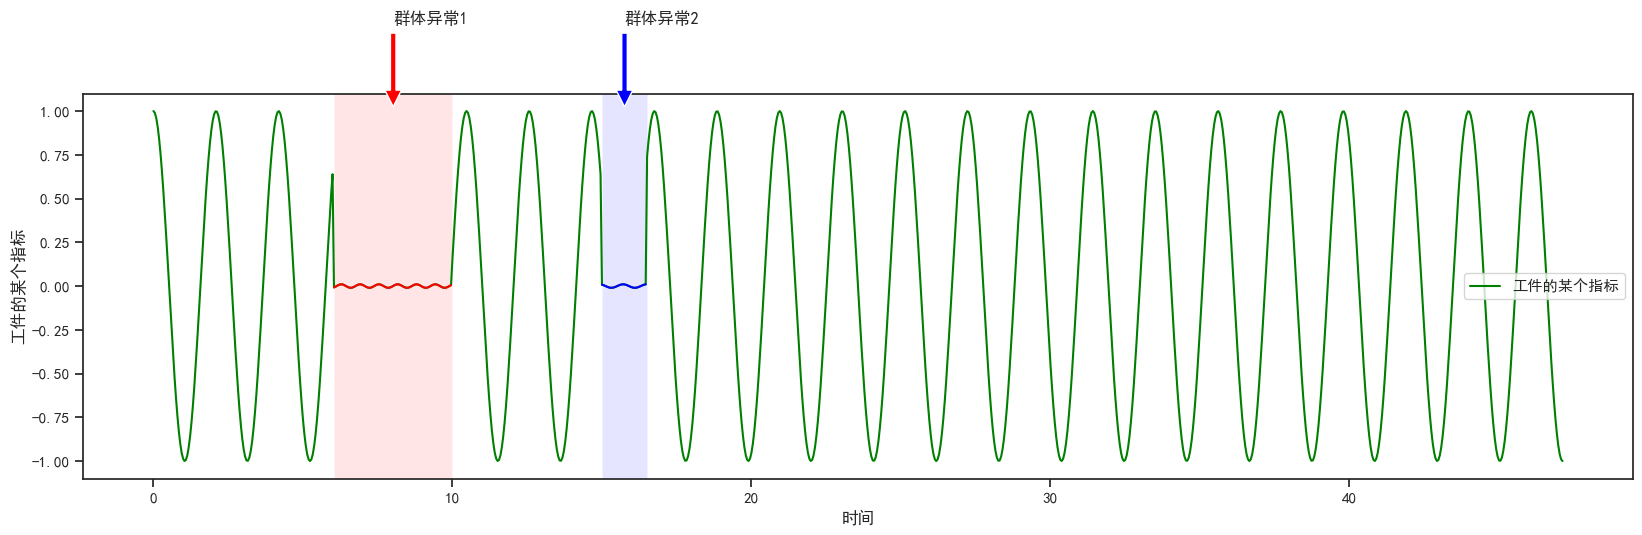

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 生成 x 数据
x = np.linspace(0, 15 * np.pi, 1000)

# 生成对应的 y 数据
y = np.cos(3 * x)

start_idx1 = np.where(x >= 6)[0][0]
end_idx1 = np.where(x >= 10)[0][0]
y[start_idx1:end_idx1] = 0.01 * np.cos(10 * x[start_idx1:end_idx1])

start_idx2 = np.where(x >= 15)[0][0]
end_idx2 = np.where(x >= 16.5)[0][0]
y[start_idx2:end_idx2] = 0.01 * np.cos(8 * x[start_idx2:end_idx2])

# 绘制 cos(x) 函数
plt.figure(figsize=(20, 5))
sns.lineplot(x=x, y=y, label='工件的某个指标', color='green')
sns.lineplot(x=x[start_idx1:end_idx1], y=y[start_idx1:end_idx1], color='red')
sns.lineplot(x=x[start_idx2:end_idx2], y=y[start_idx2:end_idx2], color='blue')

# 用红色框框住这两个区域
plt.axvspan(x[start_idx1], x[end_idx1], facecolor='red', alpha=0.1)
plt.axvspan(x[start_idx2], x[end_idx2], facecolor='blue', alpha=0.1)

# 使用箭头说明这是群体异常
plt.annotate('群体异常1', xy=((x[start_idx1] + x[end_idx1]) / 2, 1), xytext=((x[start_idx1] + x[end_idx1]) / 2, 1.5),
             arrowprops=dict(facecolor='red', shrink=0.05),
             )

plt.annotate('群体异常2', xy=((x[start_idx2] + x[end_idx2]) / 2, 1), xytext=((x[start_idx2] + x[end_idx2]) / 2, 1.5),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             )

# 设置图形标题和标签
plt.xlabel('时间')
plt.ylabel('工件的某个指标')

# 显示图例
plt.legend()

# 显示图形
plt.show()


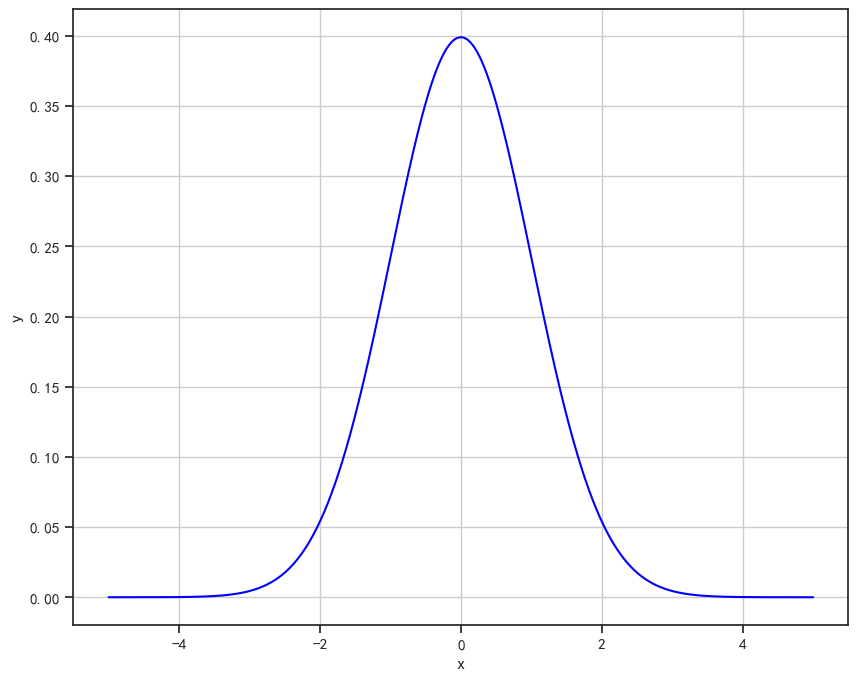

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# 定义参数
mu = 0
sigma = 1

# 生成一维高斯分布的数据
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, mu, sigma)

# 将数据放入 DataFrame
data = {'x': x, 'y': y}
df = pd.DataFrame(data)

# 使用Seaborn绘制一维高斯分布
plt.figure(figsize=(10, 8))
sns.lineplot(data=df, x='x', y='y', color='blue')
plt.xlabel('x')
plt.grid(True)
plt.show()


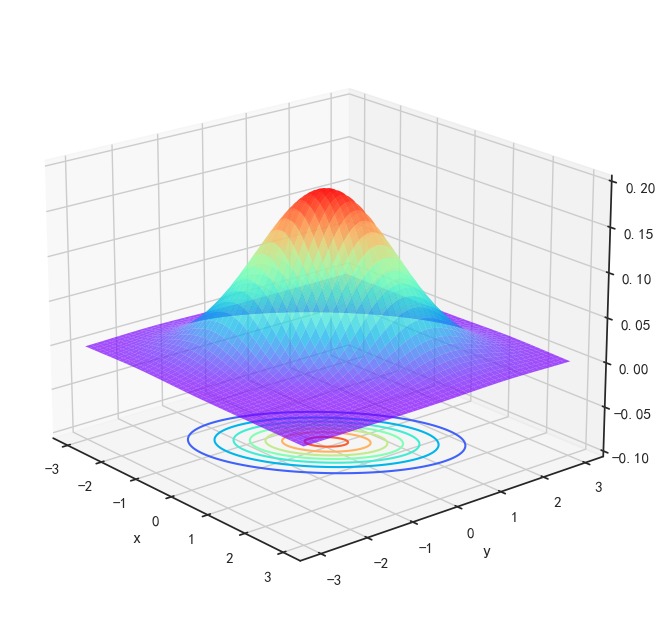

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# 定义参数
mu = np.array([0, 0])
sigma = np.array([[1, 0.5], [0.5, 1]])

# 生成网格数据
x, y = np.mgrid[-3:3:.0005, -3:3:.0005]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

# 生成二维高斯分布的数据
z = multivariate_normal(mu, sigma).pdf(pos)

# 绘制二维高斯分布的立体图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d', aspect='auto')
ax.plot_surface(x, y, z, cmap='rainbow', linewidth=0, alpha=0.7)

ax.contour(x,y,z,zdir='z', offset=-0.1,cmap="rainbow")  #生成z方向投影，投到x-y平面

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlim(-0.1, 0.2)  #拉开坐标轴范围显示投影

# 调整观察角度
ax.view_init(elev=20, azim=-40)  # 调整仰角和方位角

plt.show()

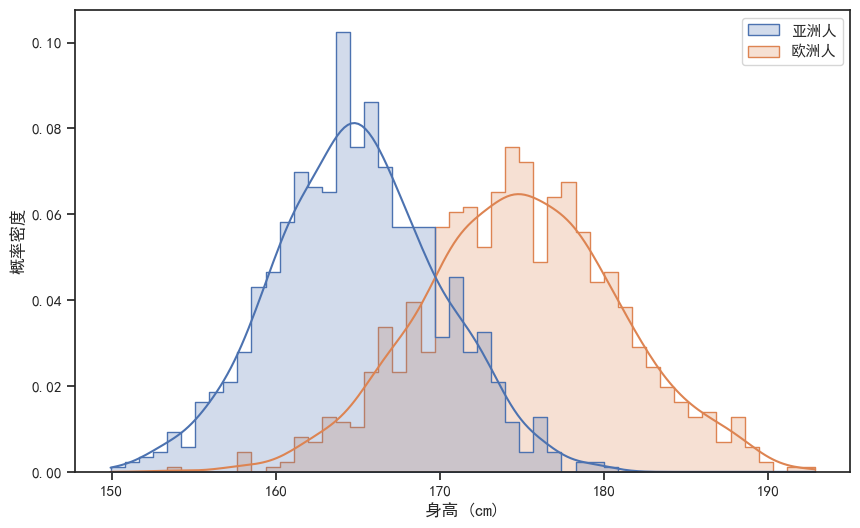

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 模拟亚洲人身高数据
asian_heights = np.random.normal(loc=165, scale=5, size=1000)

# 模拟欧洲人身高数据
european_heights = np.random.normal(loc=175, scale=6, size=1000)

# 合并数据
all_heights = np.concatenate([asian_heights, european_heights])
labels = ['亚洲人'] * len(asian_heights) + ['欧洲人'] * len(european_heights)

# 使用 Seaborn 绘制直方图
plt.figure(figsize=(10, 6))
sns.histplot(x=all_heights, hue=labels, bins=50, kde=True, element="step", stat="density", common_norm=False)

plt.xlabel('身高 (cm)')
plt.ylabel('概率密度')
plt.show()
